In [68]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [14]:
# Load the dataset
data = pd.read_excel('House_Rent_Train.xlsx')

# Explore the dataset
print(data.head())  # Display the first few rows of the dataset



                                 id  type       locality      activation_date  \
0  ff8081815733a243015733b2876600a6  BHK2            NaN     21-04-2018 14:44   
1  ff8081815ee25e15015ee50004da2acd  BHK2      Bellandur  2017-09-10 12:48:00   
2  ff80818163f29c9e0163f46770b873e7  BHK3  Thiruvanmiyur  2018-12-06 22:02:00   
3  ff80818164b68a700164b74b1b247a1d  BHK1      Attiguppe     20-07-2018 16:22   
4  ff80818163b1faf00163b4b9b8a163b1  BHK3      Kodihalli     31-05-2018 17:41   

    latitude  longitude lease_type  gym  lift  swimming_pool  ...  bathroom  \
0  12.934471  77.634471     FAMILY  1.0   1.0            1.0  ...       2.0   
1  12.929557  77.672280     ANYONE  0.0   1.0            0.0  ...       2.0   
2  12.982870  80.262012     FAMILY  0.0   1.0            0.0  ...       3.0   
3  12.955991  77.531634     FAMILY  0.0   0.0            0.0  ...       1.0   
4  12.963903  77.649446     FAMILY  0.0   0.0            0.0  ...       3.0   

  facing cup_board  floor  total_floor

In [9]:
data.sample(10)

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
2151,ff8081815d208a99015d264c625f75d7,BHK1,Banashankari,2017-09-07 17:44:00,12.925593,77.549873,ANYONE,0.0,0.0,0.0,...,1.0,E,3.0,1.0,4.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,1.0,10000.0
9440,ff8081815fdc759c015fe24f7a30413d,BHK3,"Maithri Layout,Kadugodi",22-11-2017 13:03,12.995507,77.759101,FAMILY,1.0,1.0,1.0,...,2.0,E,9.0,3.0,9.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,26000.0
7843,ff8081814cb771fb014cc2d6f12b265e,BHK2,Jogupalya,2018-06-05 19:14:00,12.973047,77.626748,FAMILY,0.0,0.0,0.0,...,2.0,E,2.0,2.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,1.0,19500.0
5578,ff8081815db1d530015db745a9f859ef,BHK1,Marathahalli,2018-05-02 18:21:00,12.956507,77.697337,ANYONE,0.0,0.0,0.0,...,1.0,S,0.0,1.0,4.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IF,0.0,8000.0
17278,ff8081814e774f7c014e7b87921f1dac,BHK2,BTM 2nd Stage,24-06-2018 11:25,12.907339,77.611914,ANYONE,0.0,0.0,0.0,...,2.0,N,2.0,1.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,1.0,15500.0
13715,ff8081815db1d530015dbbc5de7f612e,BHK3,Kaikondrahalli,22-01-2018 17:01,12.917008,77.677726,ANYONE,1.0,1.0,1.0,...,3.0,N,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":t...",BOREWELL,AP,1.0,40000.0
3625,ff80818161f4c5800161ff0a7fb07005,BHK2,Samethanahalli,2018-08-03 21:26:00,12.979785,77.794961,ANYONE,1.0,1.0,0.0,...,2.0,E,2.0,7.0,10.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,1.0,16000.0
9624,ff8081815f8057de015f80703db30e0a,BHK2,"Varsova Layout,Kaggadasapura",2017-04-11 22:21:00,12.979487,77.675554,FAMILY,0.0,1.0,0.0,...,2.0,E,2.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,2.0,21000.0
17034,ff808181620eb6160162104273ad0778,BHK2,Padmanabhanagar,2018-11-03 13:57:00,12.918052,77.555714,FAMILY,0.0,0.0,0.0,...,1.0,N,3.0,1.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0.0,17000.0
5666,ff8081815ed1976a015edb795ac360ec,BHK3,"Adarsh Palm Retreat,Bellandur",2017-02-10 12:54:00,12.920331,77.688482,COMPANY,1.0,1.0,1.0,...,3.0,E,4.0,6.0,11.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,3.0,42000.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  float64
 8   lift             20555 non-null  float64
 9   swimming_pool    20555 non-null  float64
 10  negotiable       20555 non-null  float64
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  float64
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [16]:
data['activation_date'] = pd.to_datetime(data['activation_date'])

In [53]:
data['amenities'] 

0        {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...
1        {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...
2        {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...
3        {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
4        {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
                               ...                        
20550    {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
20551    {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
20552    {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
20553    {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
20554    {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
Name: amenities, Length: 20555, dtype: object

In [19]:
nan_counts_per_column = data.isna().sum()
print(nan_counts_per_column)

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64


In [50]:
nan_percentage_per_column = (data.isna().sum() / len(data)) * 100
print(nan_percentage_per_column)

id                 0.0
type               0.0
locality           0.0
activation_date    0.0
latitude           0.0
longitude          0.0
lease_type         0.0
gym                0.0
lift               0.0
swimming_pool      0.0
negotiable         0.0
furnishing         0.0
parking            0.0
property_size      0.0
property_age       0.0
bathroom           0.0
facing             0.0
cup_board          0.0
floor              0.0
total_floor        0.0
amenities          0.0
water_supply       0.0
building_type      0.0
balconies          0.0
rent               0.0
dtype: float64


In [47]:
columns_cata = ['type', 'locality', 'activation_date', 'lease_type', 'furnishing', 'facing', 'amenities', 'water_supply', 'building_type','parking']

for col in columns_cata:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)


In [49]:
columns_int=set(data.columns) - set(columns_cata) - set(['id'])
for col in columns_int:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

In [54]:
#Assuming 'df' is your DataFrame
#Extract the amenities column and convert it from a JSON-like string to a dictionary
data['amenities'] = data['amenities'].apply(json.loads)
#Extract amenities and create new columns
amenities_list = ['LIFT', 'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP']
for amenity in amenities_list:
    data[amenity] = data['amenities'].apply(lambda x: 1 if amenity in x and x[amenity] else 0)
#Drop the original 'amenities' column if no longer needed
data.drop('amenities', axis=1, inplace=True)

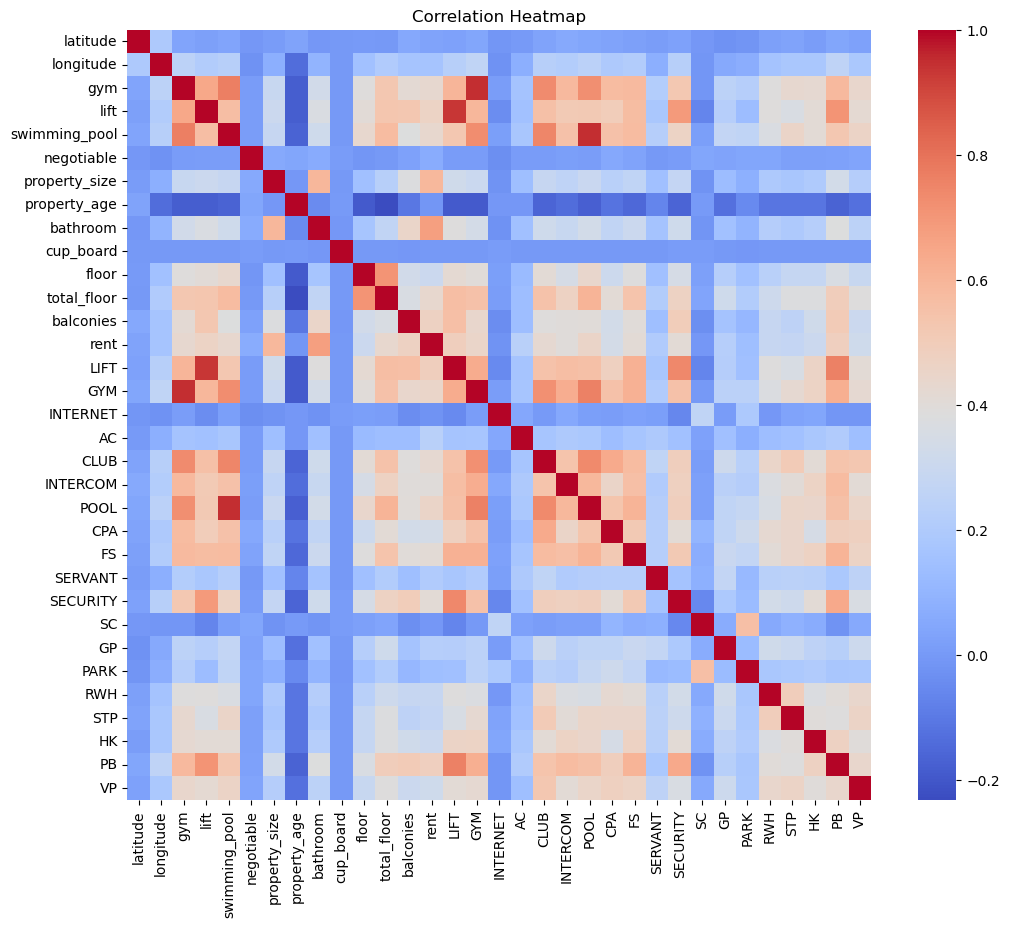

In [57]:
correlation_matrix = data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [58]:
# Extract correlations with the target variable
target_correlations = correlation_matrix['rent'].sort_values(ascending=False)

print("Correlation with the target variable:")
print(target_correlations)


Correlation with the target variable:
rent             1.000000
bathroom         0.677390
property_size    0.588315
LIFT             0.490032
PB               0.483128
balconies        0.472221
lift             0.461437
POOL             0.453851
GYM              0.448649
total_floor      0.436968
swimming_pool    0.434263
gym              0.431120
CLUB             0.427005
SECURITY         0.412161
FS               0.410886
INTERCOM         0.396101
CPA              0.339661
VP               0.318468
HK               0.307470
floor            0.306242
RWH              0.286969
STP              0.274494
AC               0.235029
GP               0.224291
SERVANT          0.204210
longitude        0.163755
PARK             0.141179
negotiable       0.062429
latitude         0.032829
cup_board       -0.001245
SC              -0.009572
property_age    -0.010619
INTERNET        -0.021140
Name: rent, dtype: float64


In [59]:
len(data.columns)
#df[['INTERNET','rent']].groupby(['INTERNET']).mean()

43

In [92]:
columns_to_drop=['negotiable','cup_board','SC','property_age','INTERNET']
df=data.drop(columns=columns_to_drop)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               20555 non-null  object        
 1   type             20555 non-null  object        
 2   locality         20555 non-null  object        
 3   activation_date  20555 non-null  datetime64[ns]
 4   latitude         20555 non-null  float64       
 5   longitude        20555 non-null  float64       
 6   lease_type       20555 non-null  object        
 7   gym              20555 non-null  float64       
 8   lift             20555 non-null  float64       
 9   swimming_pool    20555 non-null  float64       
 10  furnishing       20555 non-null  object        
 11  parking          20555 non-null  object        
 12  property_size    20555 non-null  float64       
 13  bathroom         20555 non-null  float64       
 14  facing           20555 non-null  objec

In [94]:
current_date = datetime.today()
df['age_of_property'] = (current_date - df['activation_date']).dt.days // 365

In [95]:
df.drop(columns=['activation_date'],inplace=True)

In [96]:
df.columns

Index(['id', 'type', 'locality', 'latitude', 'longitude', 'lease_type', 'gym',
       'lift', 'swimming_pool', 'furnishing', 'parking', 'property_size',
       'bathroom', 'facing', 'floor', 'total_floor', 'water_supply',
       'building_type', 'balconies', 'rent', 'LIFT', 'GYM', 'AC', 'CLUB',
       'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'GP', 'PARK',
       'RWH', 'STP', 'HK', 'PB', 'VP', 'age_of_property'],
      dtype='object')

In [97]:
df.drop(columns=['lift','gym','swimming_pool'],inplace=True)

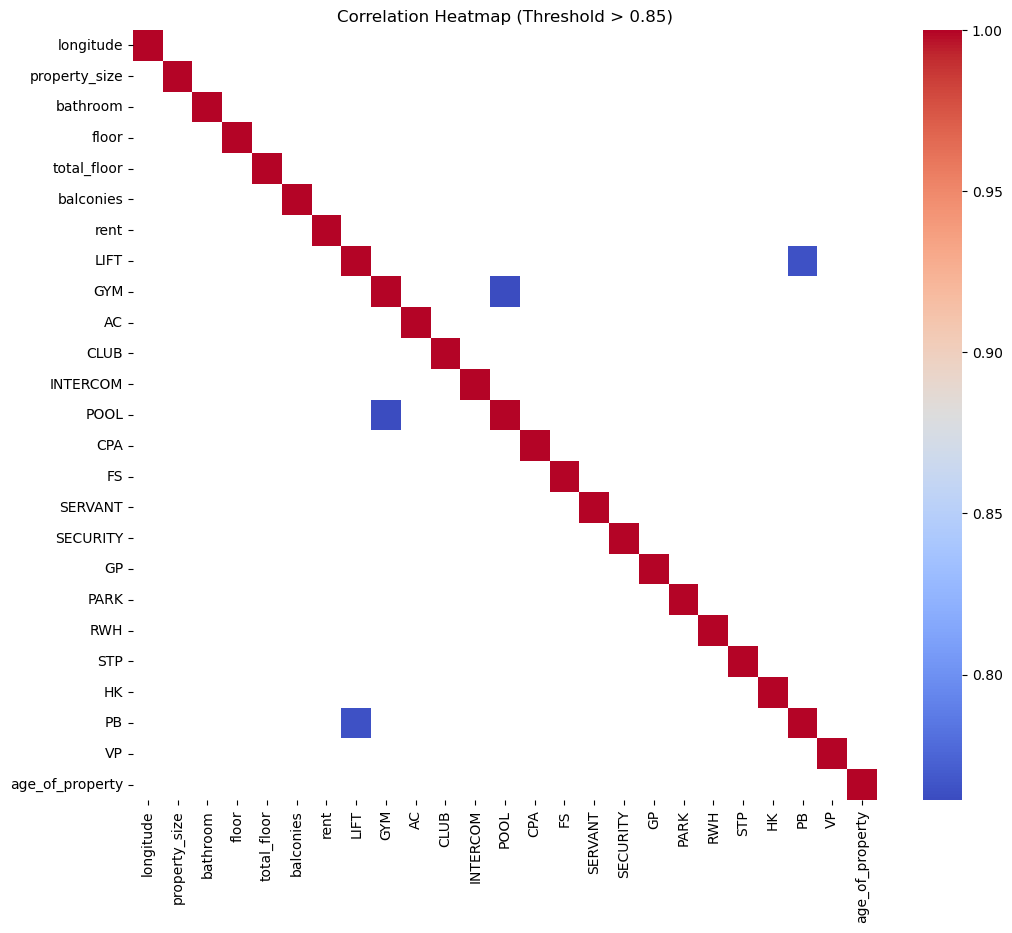

In [86]:
correlation_matrix = df.corr()
# Filter correlation values based on the threshold
threshold = 0.75
filtered_corr_matrix = correlation_matrix[abs(correlation_matrix) > threshold]

# Plot a heatmap of the filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap (Threshold > 0.85)")
plt.show()

In [98]:
df.head()
#cata_column=['id','type','locality','']

,id,type,locality,latitude,longitude,lease_type,furnishing,parking,property_size,bathroom,...,SERVANT,SECURITY,GP,PARK,RWH,STP,HK,PB,VP,age_of_property
0,ff8081815733a243015733b2876600a6,BHK2,Whitefield,12.934471,77.634471,FAMILY,SEMI_FURNISHED,BOTH,1250.0,2.0,...,0,1,1,0,1,1,0,1,1,5
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,12.929557,77.672280,ANYONE,SEMI_FURNISHED,BOTH,1400.0,2.0,...,0,1,0,1,1,1,0,1,1,5
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,SEMI_FURNISHED,BOTH,1350.0,3.0,...,0,0,0,1,0,0,0,1,1,4
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,12.955991,77.531634,FAMILY,SEMI_FURNISHED,TWO_WHEELER,600.0,1.0,...,0,0,0,0,0,0,0,0,0,5
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,12.963903,77.649446,FAMILY,SEMI_FURNISHED,BOTH,1500.0,3.0,...,0,0,0,1,0,0,0,0,1,5


In [ ]:
#label_encoder = LabelEncoder()
#df['categorical_column_encoded'] = label_encoder.fit_transform(df['categorical_column'])

In [101]:
# the corr with PB and lift then we can drop PB 
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_geocoder")
pincode =[]
for i in range(20555):
    latitude = df['latitude'][i]
    longitude = df['longitude'][i]

    location = geolocator.reverse((latitude, longitude), exactly_one=True)

    pincode.append(location[-2][-13:-7])
